In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import nibabel as nib


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure

import mayavi
from mayavi import mlab

In [8]:
# let's load a segmented brain image
# this is the path on daniel's computer, but I will send you a copy
# I will send you 2 files, one is a .img and one is a .hdr
# both files always need to be kept together in the same directory

# fname = '/home/dtward/data/mricloud_atlases/Adult27-55/Adt27-55_01_Adt27-55_01_FullLabels.img'
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

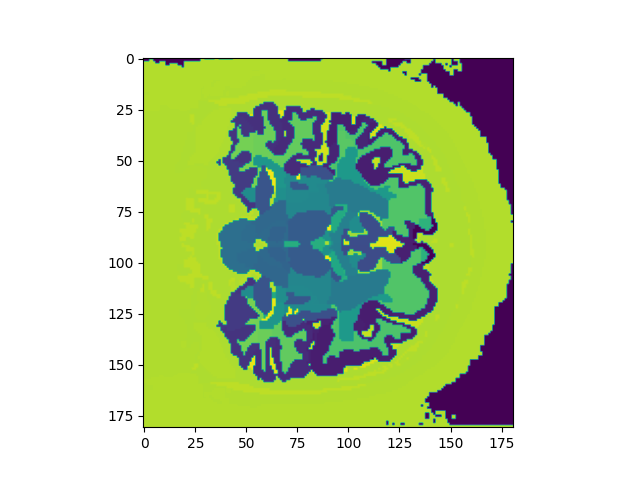

In [9]:
fig,ax = plt.subplots()
ax.imshow(I[:,I.shape[1]//2])

<IPython.core.display.Javascript object>


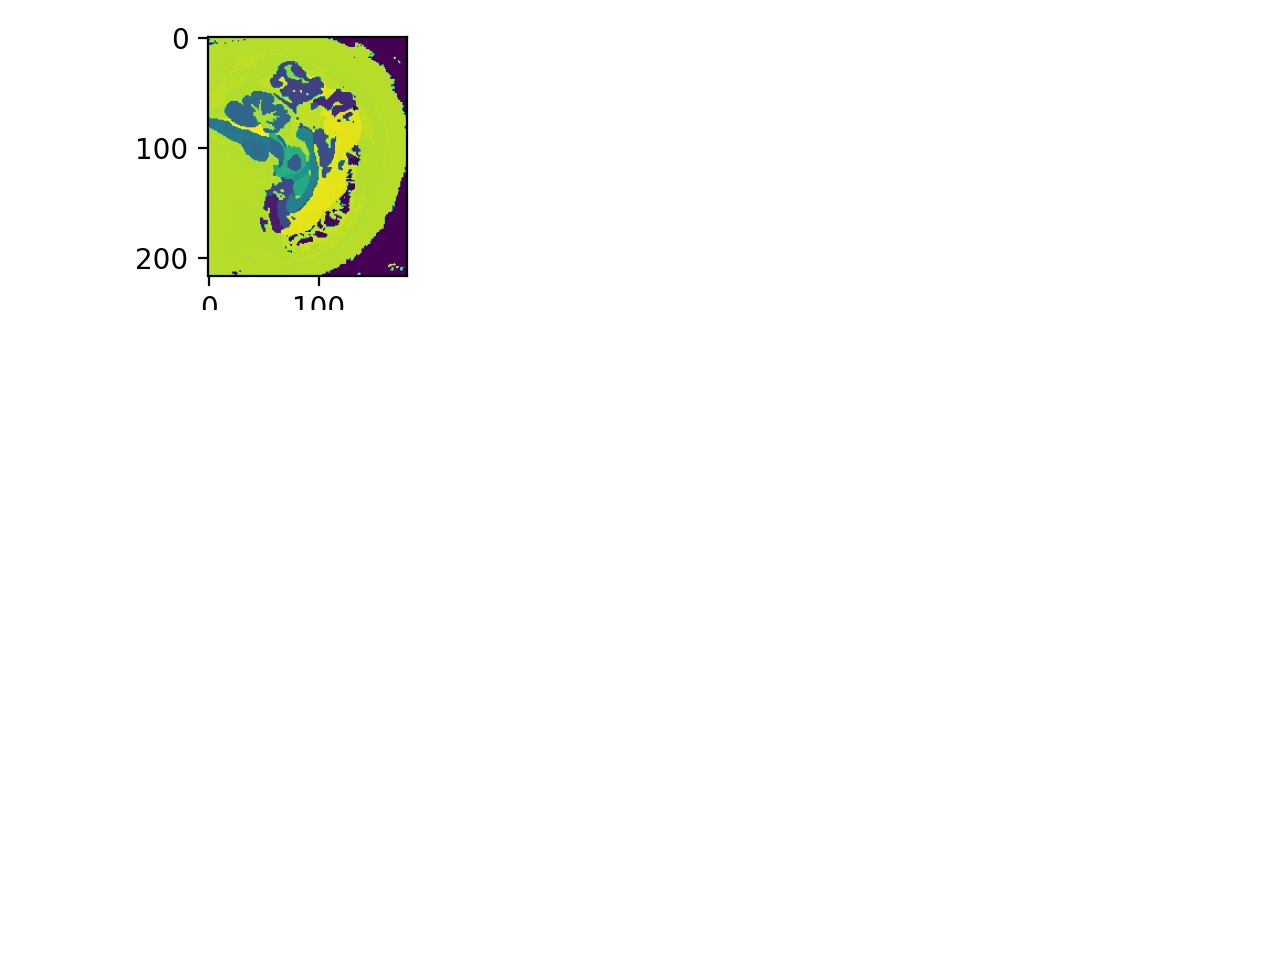

In [4]:
fig,ax = plt.subplots()
ax.imshow(I[I.shape[0]//2])

In [3]:
# we want to find the integer ids that correspond 
# to your structures, and extract them
# left amygdala has the id 73
ids = [73]
# left hippo has id 75
ids = [75] 
# as we start moving up the tree, we need to add more and more structures
# the next level is limbic lobe
# so let's find all the structures in the limbic lobe (everywhere that says limbic in the third column)
ids = [45,47,61,63,65,67,69,73,75,282]
# extract a binary image
S = np.zeros_like(I) # initialize this binary image to 0
# loop through all the ids
for id_ in ids:
    S = np.logical_or(S,I==id_)

<IPython.core.display.Javascript object>


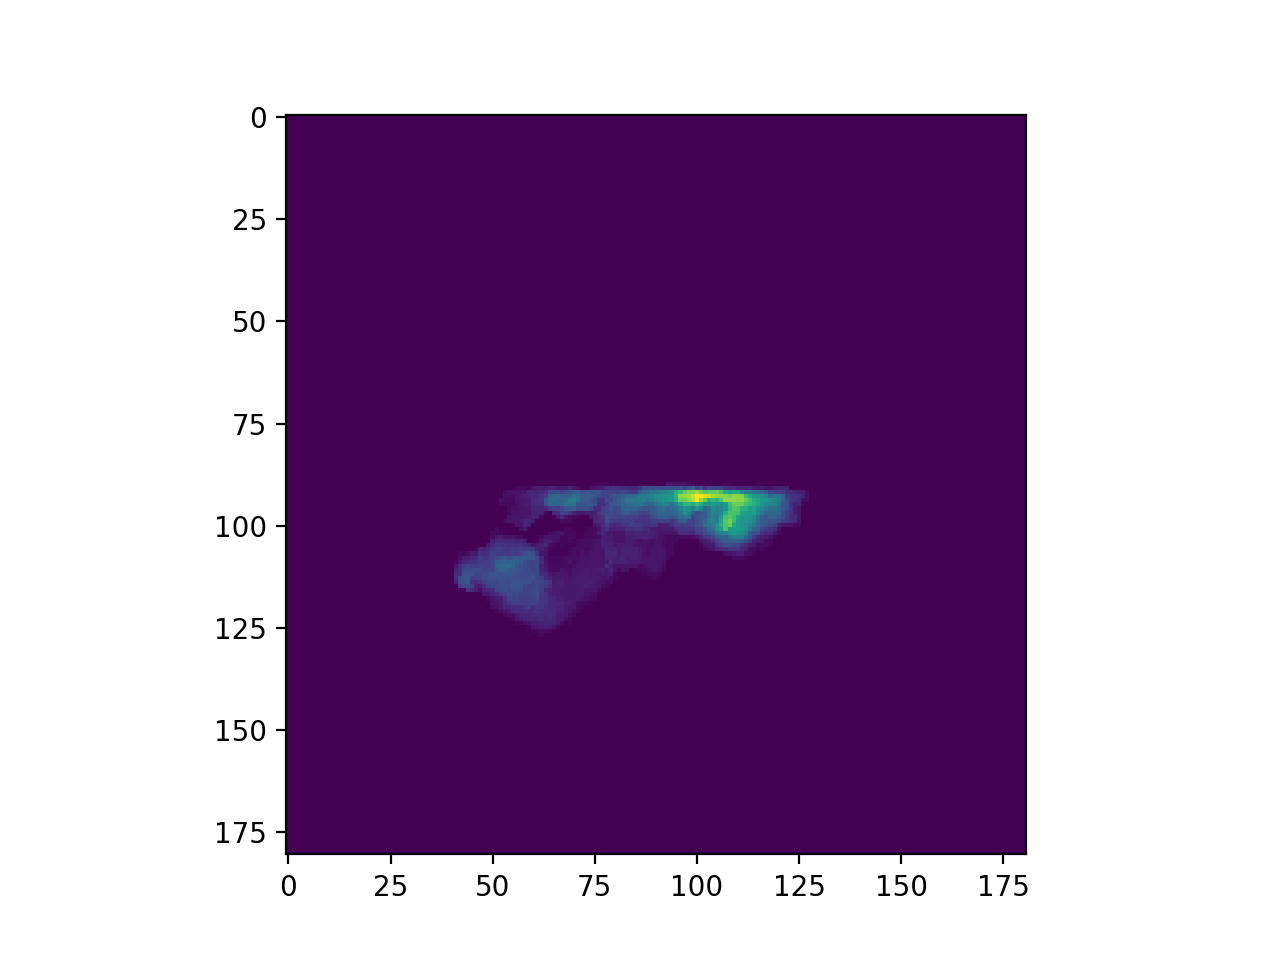

In [18]:
fig,ax = plt.subplots()
# instead of a slice, I'll show a projection
# by suming over this axis
ax.imshow(np.sum(S,axis=1))

In [4]:
# now we'll generate a surface
verts, faces, normals, values = measure.marching_cubes(S*1.0, 0.5)

<IPython.core.display.Javascript object>


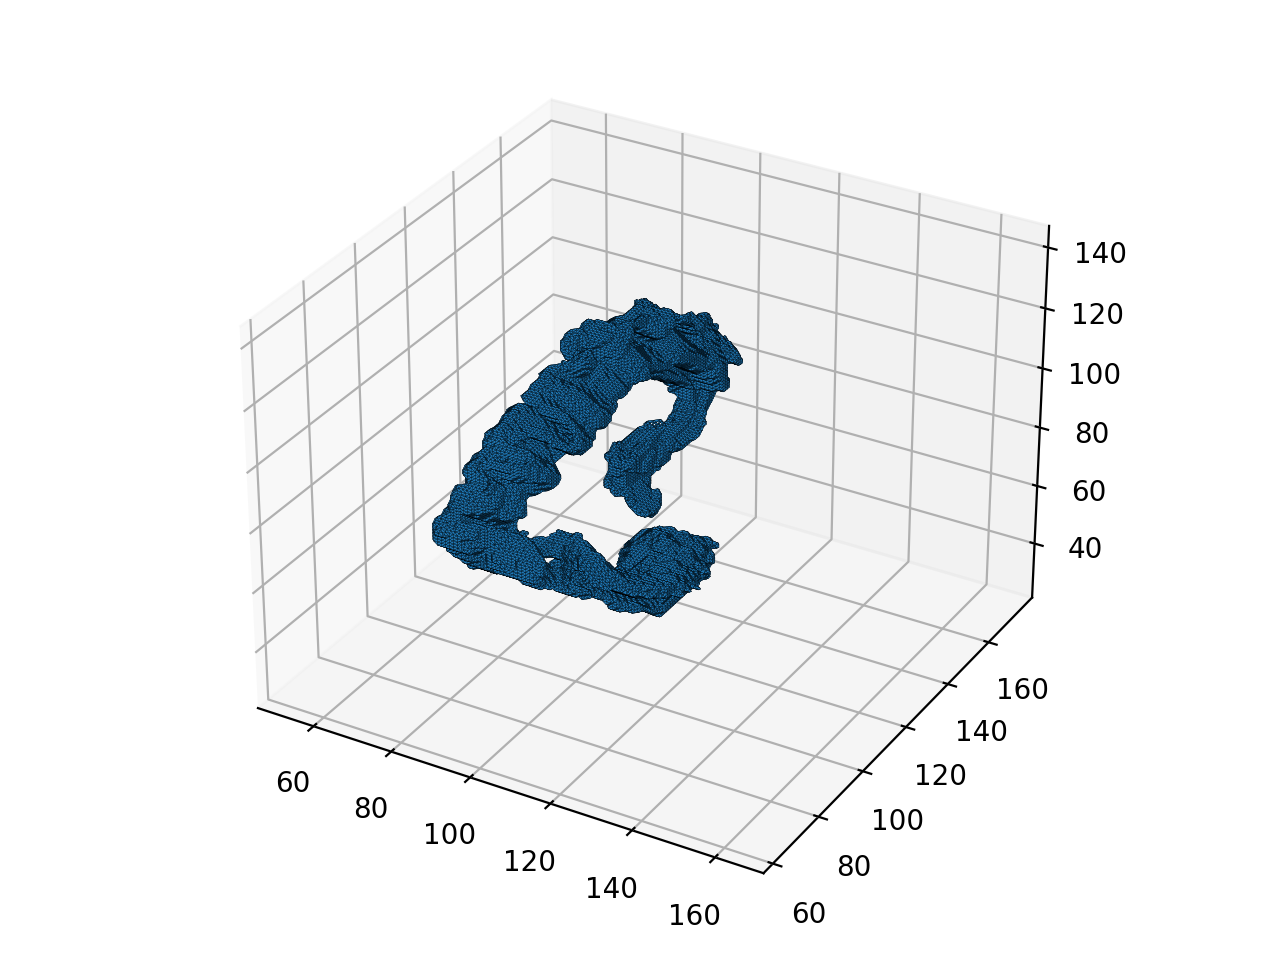

In [5]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
mesh.set_linewidth(0.1)
ax.add_collection3d(mesh)

#ax.set_xlim(0, I.shape[0]-1)  
#ax.set_ylim(0, I.shape[1]-1)  
#ax.set_zlim(0, I.shape[2]-1)  
ax.set_xlim(np.min(verts[:,0]),np.max(verts[:,0]))
ax.set_ylim(np.min(verts[:,1]),np.max(verts[:,1]))
ax.set_zlim(np.min(verts[:,2]),np.max(verts[:,2]))

# this code below will set equal aspect ratio
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()
c = np.array([np.mean(xlim),np.mean(ylim),np.mean(zlim)])
d = np.array([xlim[1]-c[0], ylim[1]-c[1],zlim[1]-c[2]])
maxd = np.max(d)
ax.set_xlim(c[0]-maxd,c[0]+maxd)
ax.set_ylim(c[1]-maxd,c[1]+maxd)
ax.set_zlim(c[2]-maxd,c[2]+maxd)

plt.tight_layout()
plt.show()

In [6]:
verts.shape

(26256, 3)

# TODO
Repeat this for all the different structures on your graph.

As you move up the graph, you'll need to include more and more structures in your list of ids.

In [7]:
# Using Mayavi

%gui qt
import mayavi
from mayavi import mlab 

mlab.init_notebook()
fig = mlab.figure(0,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

# Creating images for the presentation

In [5]:
mlab.init_notebook()
mlab.test_plot3d()

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import nibabel as nib
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import mayavi
from mayavi import mlab
import pylab as pl

In [22]:
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

ids = [73] # Left amygdala

S = np.zeros_like(I) 
for id_ in ids:
    S = np.logical_or(S,I==id_)

mlab.init_notebook()
fig = mlab.figure(0,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))
mlab.savefig(filename='left_amygdala.png')
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [23]:
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

ids = [75] # Left hippocampus

S = np.zeros_like(I) 
for id_ in ids:
    S = np.logical_or(S,I==id_)

mlab.init_notebook()
fig = mlab.figure(1,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))
mlab.savefig(filename='left_hippocampus.png')
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [24]:
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

ids = [45, 47, 61, 63, 65, 67, 69, 73, 75, 282] # Left limbic system

S = np.zeros_like(I) 
for id_ in ids:
    S = np.logical_or(S,I==id_)

mlab.init_notebook()
fig = mlab.figure(2,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))
mlab.savefig(filename='left_limbic.png')
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [25]:
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

ids = [1, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 39, 43, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 75, 282] # Left cerebral cortex

S = np.zeros_like(I) 
for id_ in ids:
    S = np.logical_or(S,I==id_)

mlab.init_notebook()
fig = mlab.figure(3,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))
mlab.savefig(filename='left_cerebral_cortex.png')
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [26]:
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

ids = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 
       57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 
       139, 141, 143, 145, 147, 149, 151, 153, 155, 182, 184, 186, 188, 190, 192, 194, 196, 198, 202, 204, 206, 
       208, 210, 212, 214, 216, 218, 220, 222, 224, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 
       281, 288] # Left telencephalon

S = np.zeros_like(I) 
for id_ in ids:
    S = np.logical_or(S,I==id_)

mlab.init_notebook()
fig = mlab.figure(4,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))
mlab.savefig(filename='left_telencephalon.png')
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [27]:
fname = "Adt27-55_18_Adt27-55_18_FullLabels.hdr"
vol = nib.load(fname)
I = vol.get_fdata().squeeze()

# I[0, 0, 0] returns 0 -> the first voxel in the image is background, which has a value of 0
# Background is coded as 0s -> "Everything" contains all nonzero entries
ids = np.unique(I)
ids = set(ids)
exclude = [0, 254, 255, 256, 257, 260, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 285, 286]
exclude = set(exclude)
ids = ids - exclude

S = np.zeros_like(I) 
for id_ in ids:
    S = np.logical_or(S,I==id_)

mlab.init_notebook()
fig = mlab.figure(5,bgcolor=(1.0,1.0,1.0),fgcolor=(0.0,0.0,0.0))
mlab.clf()
mlab.contour3d(S*1.0,contours=[0.5], color=(0.0,1.0,1.0))
mlab.savefig(filename='everything.png')
fig

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

# Making colored squares to represent data

Text(0.5, 1.0, 'Value of data (randomly generated)')

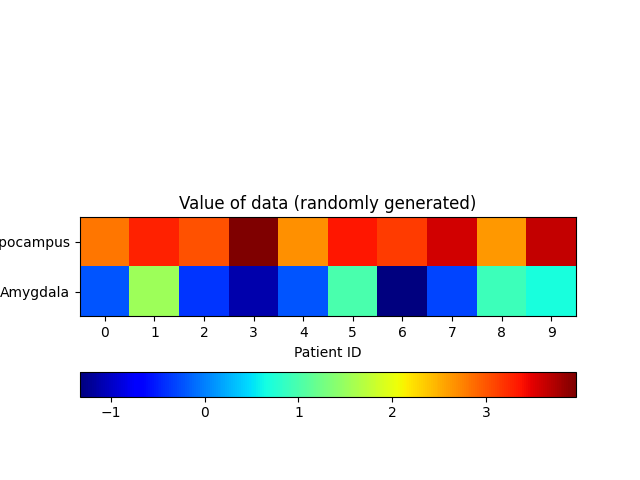

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# you can make colored squares like this
# you should do something like this for the probabilities
n = [2,10] # 2 structures, 10 patients
data = np.random.randn(*n) 
data[0,:] += 3.0
fig,ax = plt.subplots()
h = ax.imshow(data,cmap='jet')
plt.colorbar(h,orientation='horizontal')
ax.set_yticks([0,1])
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(['Hippocampus','Amygdala'])
ax.set_ylabel('Structure')
ax.set_xlabel('Patient ID')
ax.set_title('Value of data (randomly generated)')

# Making histograms to represent the data

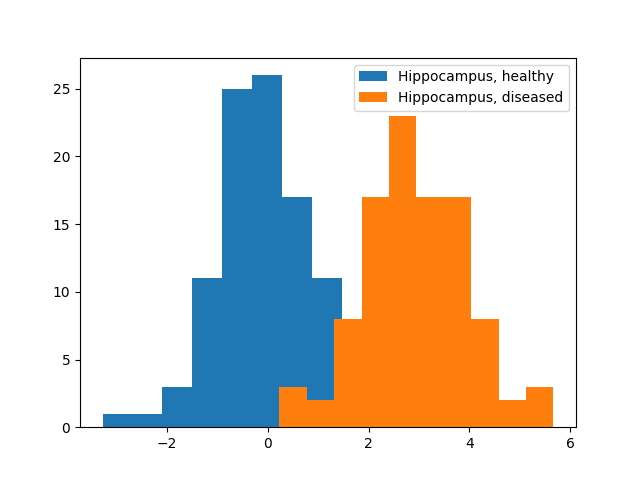

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

hippo_healthy = np.random.normal(size = 100)
hippo_unhealthy = np.random.normal(loc = 3, scale = 1, size = 100)

plt.figure(0)
plt.hist(hippo_healthy, label = "Hippocampus, healthy")
plt.hist(hippo_unhealthy, label = "Hippocampus, diseased")
plt.legend(loc='upper right')

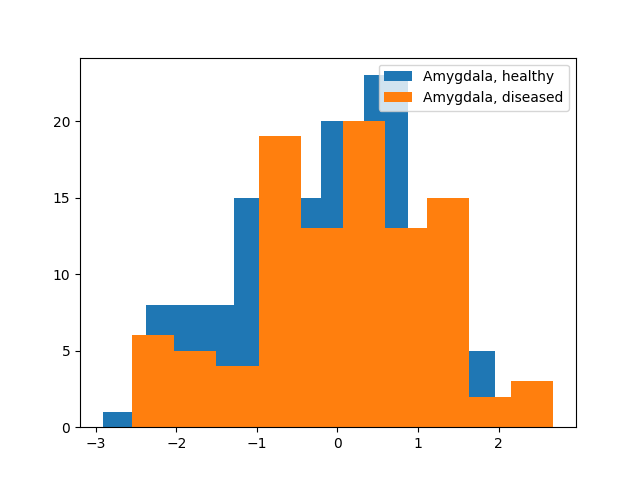

In [2]:
amyg_healthy = np.random.normal(size = 100)
amyg_unhealthy = np.random.normal(size = 100)

plt.figure(1)
plt.hist(amyg_healthy, label = "Amygdala, healthy")
plt.hist(amyg_unhealthy, label = "Amygdala, diseased")
plt.legend(loc = 'upper right')

# Barplot of case 2

Text(0.5, 1.0, 'Posterior probability of being affected for case 2 (hippocampus is affected)')

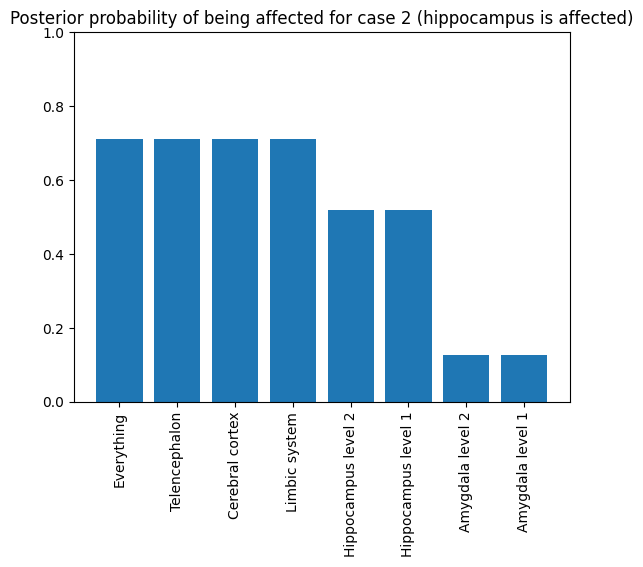

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([0.7119158910094903, 0.7119158910094903, 0.7119158910094903, 0.7119158910094903, 0.5180468573519893, 
        0.5180468573519893, 0.12707237798942403, 0.12707237798942403])
names = ["Everything", "Telencephalon", "Cerebral cortex", "Limbic system", "Hippocampus level 2", 
         "Hippocampus level 1", "Amygdala level 2", "Amygdala level 1"]

plt.figure(2)
plt.bar(names, data)
plt.xticks(rotation = 90)
plt.ylim(0, 1)
plt.title("Posterior probability of being affected for case 2 (hippocampus is affected)")

# Visualizations without labels for poster

([], [])

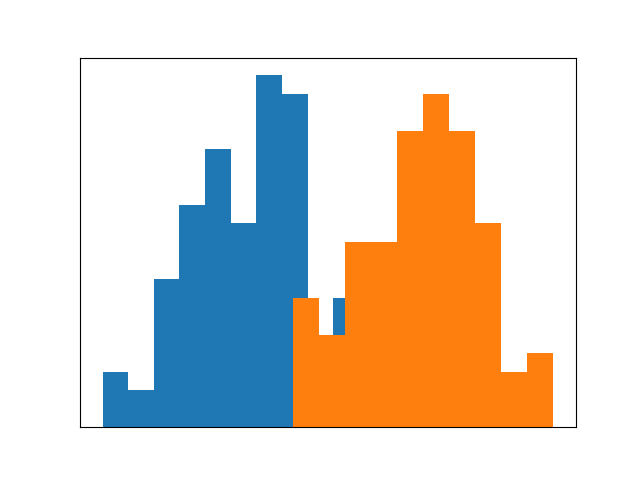

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

hippo_healthy = np.random.normal(size = 100)
hippo_unhealthy = np.random.normal(loc = 3, scale = 1, size = 100)

plt.figure(0)
plt.hist(hippo_healthy)
plt.hist(hippo_unhealthy)
plt.xticks([])
plt.yticks([])

([], [])

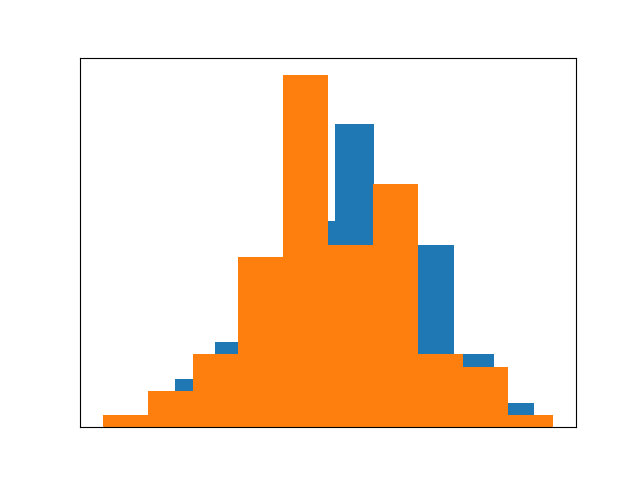

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

amyg_healthy = np.random.normal(size = 100)
amyg_unhealthy = np.random.normal(size = 100)

plt.figure(1)
plt.hist(amyg_healthy)
plt.hist(amyg_unhealthy)
plt.xticks([])
plt.yticks([])

([], [])

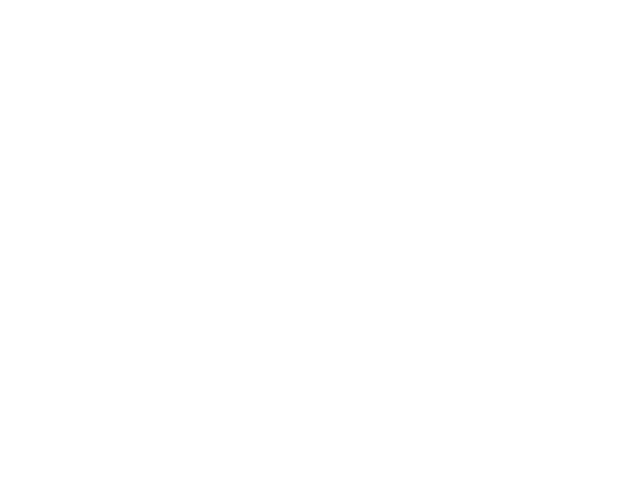

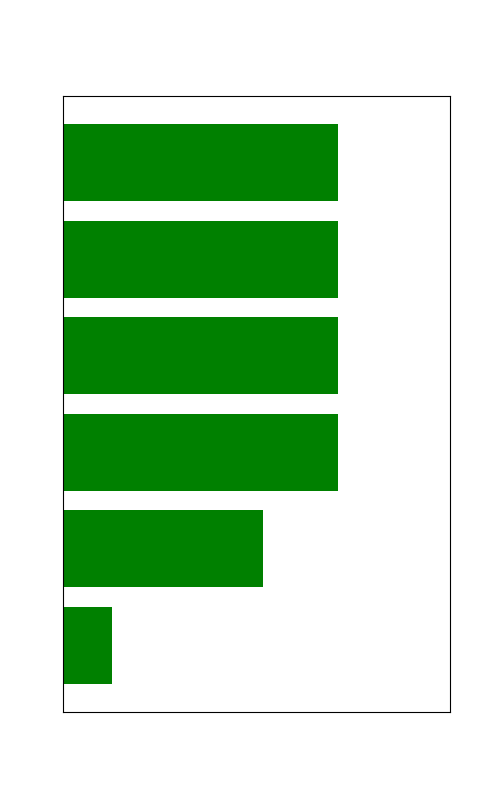

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

data = np.array([0.7119158910094903, 0.7119158910094903, 0.7119158910094903, 0.7119158910094903,
        0.5180468573519893, 0.12707237798942403])
names = ["Everything", "Telencephalon", "Cerebral cortex", "Limbic system",
         "Hippocampus", "Amygdala"]

plt.figure(2)
plt.figure(figsize = (5, 8))
plt.barh(names, data, color = "green")
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])